In [3]:
import pandas as pd
import glob

In [4]:
files_1d = glob.glob('Data/pm-data/*1d.xlsx')

# อ่านและรวมข้อมูลชุด 1h
df = pd.concat([pd.read_excel(file) for file in files_1d], ignore_index=True)

df

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,temperature,pm_2_5_sp
0,0,2021-08-16 07:00:00.000,Asia/Bangkok,97.712066,6.419446,5.979462,24.220945,NaN
1,1,2021-08-17 07:00:00.000,Asia/Bangkok,95.922874,9.716751,9.142292,24.807743,NaN
2,2,2021-08-18 07:00:00.000,Asia/Bangkok,87.291672,8.607477,7.901869,26.346601,NaN
3,3,2021-08-19 07:00:00.000,Asia/Bangkok,86.124131,11.832133,10.989553,27.062054,NaN
4,4,2021-08-20 07:00:00.000,Asia/Bangkok,89.532874,8.965864,8.201077,26.208938,NaN
...,...,...,...,...,...,...,...,...
27445,654,2025-02-08 07:00:00.000,Asia/Bangkok,97.108096,27.818689,25.684798,26.560363,26.109484
27446,655,2025-02-09 07:00:00.000,Asia/Bangkok,96.687594,22.012687,20.455970,26.746786,20.529851
27447,656,2025-02-10 07:00:00.000,Asia/Bangkok,97.279796,27.898983,25.261628,26.531510,25.914244
27448,657,2025-02-11 07:00:00.000,Asia/Bangkok,96.373096,30.023463,27.361650,26.441329,28.127832


In [5]:
df['timezone'].unique()

array(['Asia/Bangkok'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   27450 non-null  int64         
 1   timestamp    27450 non-null  datetime64[ns]
 2   timezone     27450 non-null  object        
 3   humidity     26748 non-null  float64       
 4   pm_10        20312 non-null  float64       
 5   pm_2_5       27450 non-null  float64       
 6   temperature  26815 non-null  float64       
 7   pm_2_5_sp    10454 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.7+ MB


In [7]:
df = df.drop(columns=["Unnamed: 0", "timezone", "pm_10", "pm_2_5_sp"])


In [8]:
df

,timestamp,humidity,pm_2_5,temperature
0,2021-08-16 07:00:00.000,97.712066,5.979462,24.220945
1,2021-08-17 07:00:00.000,95.922874,9.142292,24.807743
2,2021-08-18 07:00:00.000,87.291672,7.901869,26.346601
3,2021-08-19 07:00:00.000,86.124131,10.989553,27.062054
4,2021-08-20 07:00:00.000,89.532874,8.201077,26.208938
...,...,...,...,...
27445,2025-02-08 07:00:00.000,97.108096,25.684798,26.560363
27446,2025-02-09 07:00:00.000,96.687594,20.455970,26.746786
27447,2025-02-10 07:00:00.000,97.279796,25.261628,26.531510
27448,2025-02-11 07:00:00.000,96.373096,27.361650,26.441329


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    27450 non-null  datetime64[ns]
 1   humidity     26748 non-null  float64       
 2   pm_2_5       27450 non-null  float64       
 3   temperature  26815 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 857.9 KB


In [10]:
# แทนค่า NaN ใน humidity และ temperature ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
df["humidity"] = df["humidity"].fillna(df["humidity"].mean())
df["temperature"] = df["temperature"].fillna(df["temperature"].mean())


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27450 entries, 0 to 27449
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    27450 non-null  datetime64[ns]
 1   humidity     27450 non-null  float64       
 2   pm_2_5       27450 non-null  float64       
 3   temperature  27450 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 857.9 KB
None


Matplotlib is building the font cache; this may take a moment.


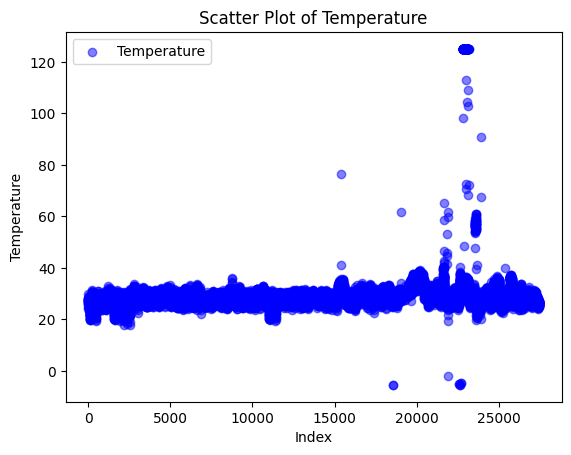

In [12]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df.index  
y = df["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature")
plt.title("Scatter Plot of Temperature")
plt.legend()
plt.show()



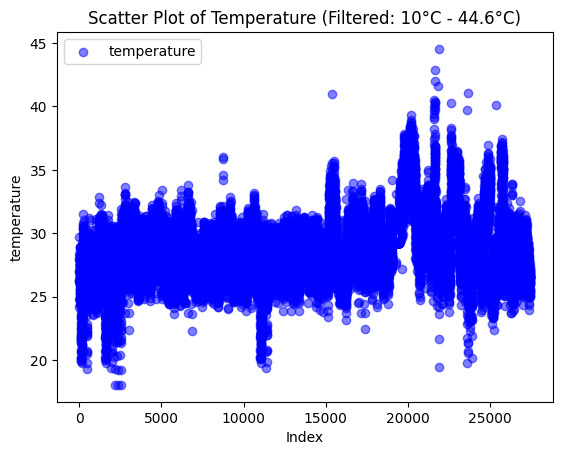

In [13]:
# กรองเฉพาะค่าที่ temperature อยู่ในช่วง 10 - 44.6 องศา
df_filtered = df[(df["temperature"] >= 10) & (df["temperature"] < 44.6)]

# ใช้ index เป็นแกน X
x = df_filtered.index  
y = df_filtered["temperature"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="temperature")
plt.xlabel("Index")
plt.ylabel("temperature")
plt.title("Scatter Plot of Temperature (Filtered: 10°C - 44.6°C)")
plt.legend()
plt.show()


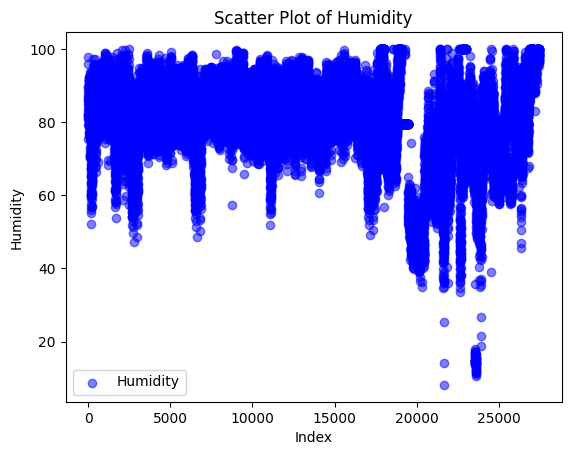

In [14]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df.index  
y = df["humidity"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="Humidity")
plt.xlabel("Index")
plt.ylabel("Humidity")
plt.title("Scatter Plot of Humidity")
plt.legend()
plt.show()



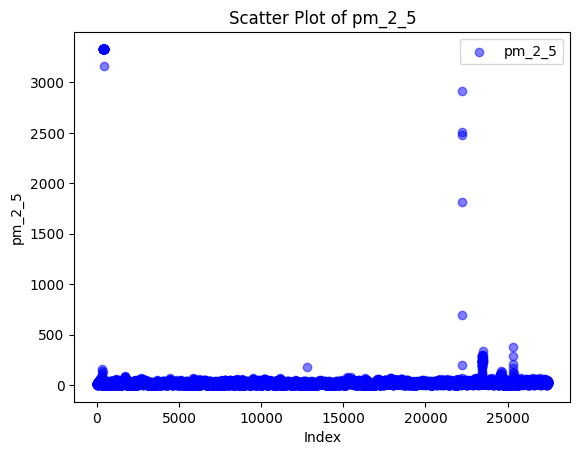

In [15]:
import matplotlib.pyplot as plt

# ใช้ index เป็นแกน X
x = df.index  
y = df["pm_2_5"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="pm_2_5")
plt.xlabel("Index")
plt.ylabel("pm_2_5")
plt.title("Scatter Plot of pm_2_5")
plt.legend()
plt.show()

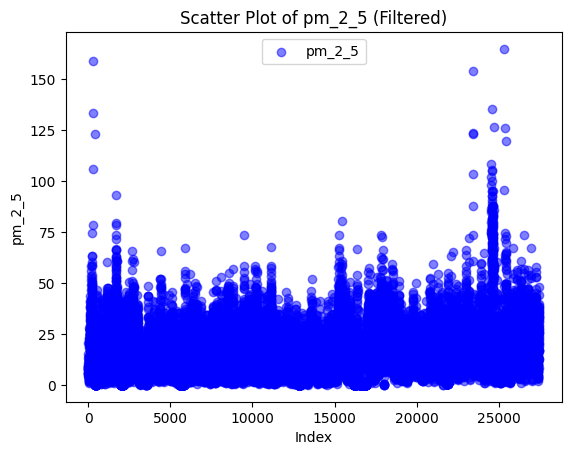

In [16]:
import matplotlib.pyplot as plt

# กรองเฉพาะค่าที่ pm_2_5 < 176
df_filtered = df[df["pm_2_5"] < 176]

# ใช้ index เป็นแกน X
x = df_filtered.index  
y = df_filtered["pm_2_5"]

# วาด scatter plot
plt.scatter(x, y, color="blue", alpha=0.5, label="pm_2_5")
plt.xlabel("Index")
plt.ylabel("pm_2_5")
plt.title("Scatter Plot of pm_2_5 (Filtered)")
plt.legend()
plt.show()


In [17]:
df

,timestamp,humidity,pm_2_5,temperature
0,2021-08-16 07:00:00.000,97.712066,5.979462,24.220945
1,2021-08-17 07:00:00.000,95.922874,9.142292,24.807743
2,2021-08-18 07:00:00.000,87.291672,7.901869,26.346601
3,2021-08-19 07:00:00.000,86.124131,10.989553,27.062054
4,2021-08-20 07:00:00.000,89.532874,8.201077,26.208938
...,...,...,...,...
27445,2025-02-08 07:00:00.000,97.108096,25.684798,26.560363
27446,2025-02-09 07:00:00.000,96.687594,20.455970,26.746786
27447,2025-02-10 07:00:00.000,97.279796,25.261628,26.531510
27448,2025-02-11 07:00:00.000,96.373096,27.361650,26.441329


In [18]:
import pandas as pd

# ตรวจสอบให้แน่ใจว่า timestamp เป็น datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# หาวันที่ล่าสุดในข้อมูล
latest_date = df["timestamp"].max()

# คำนวณเส้นแบ่ง (7 วันสุดท้ายเป็น test)
split_date = latest_date - pd.Timedelta(days=7)

# แบ่งข้อมูล
df_train = df[df["timestamp"] < split_date]  # ข้อมูลเก่ากว่า 7 วันเป็น Train
df_test = df[df["timestamp"] >= split_date]  # 7 วันสุดท้ายเป็น Test

# แสดงขนาดของชุดข้อมูล
print(f"Train set: {df_train.shape[0]} rows")
print(f"Test set: {df_test.shape[0]} rows")

Train set: 27362 rows
Test set: 88 rows


In [1]:
import pycaret
clf = pycaret.setup(data = df_train, target = 'pm_2_5')

RuntimeError: ('Pycaret only supports python 3.9, 3.10, 3.11. Your actual Python version: ', sys.version_info(major=3, minor=12, micro=8, releaselevel='final', serial=0), 'Please DOWNGRADE your Python version.')

In [ ]:
bast_model = compare_models()

In [ ]:
model = create_model('')  

In [ ]:
# ทดสอบโมเดล
evaluate_model(model)

NameError: name 'evaluate_model' is not defined